# __Exploratory Data Analysis__

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1. Roaming_data
|컬럼명|컬럼한국명|컬럼설명|샘플|
|:-----:|:-----:|:------|:------:|
|return|귀국일|로밍 여행자가 한국에 귀국한 날짜|20200131|
|iso |국가코드|2자리 국가코드|us|
|arrival |입국일|iso 국가에 도착한 날짜|20200125|
|departure|출국일|iso 국가에서 떠난 날짜|20200127|
|count|고객수|return 일자에 귀국한 로밍 고객 중 iso국가에 arrival에 도착해서 departure에 떠난 고객 수|3|


[국가코드 표](http://img.echosting.cafe24.com/guide/country_code_table.pdf)

In [2]:
roam = pd.read_csv('./data/corona_contest_data_0406/2. Roaming_data.csv')

In [3]:
roam.head(5)

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3


In [4]:
roam.describe().T

,count,mean,std,min,25%,50%,75%,max
return,212325.0,2.019772e+07,4000.485699,20191201.0,20191229.0,20200122.0,20200213.0,20200331.0
arrival,212325.0,2.019678e+07,4349.178082,20191031.0,20191220.0,20200112.0,20200204.0,20200331.0
departure,212325.0,2.019713e+07,4247.698404,20191031.0,20191223.0,20200115.0,20200207.0,20200331.0
count,212325.0,9.172853e+00,31.835063,3.0,3.0,3.0,5.0,1687.0


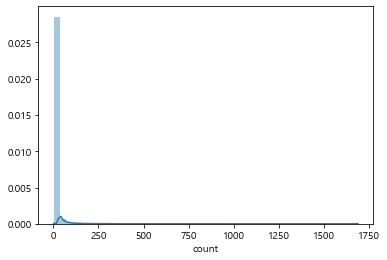

In [5]:
sns.distplot(roam['count'])

return          0
iso          2972
arrival         0
departure       0
count           0
dtype: int64


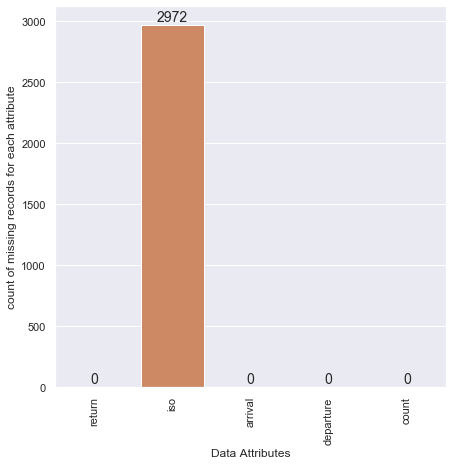

In [6]:
# 전체 결측치 확인
x = roam.columns
y = roam.isnull().sum()
print(y)
plt.figure(figsize=(7,7))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           int(height),
           fontsize=14,
           ha='center',
           va='bottom')
sns.set(font_scale = 1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

## 결측치 탐색

- 국가 컬럼인 iso에서만 2972개의 결측치가 발견되었다.

In [7]:
# 국가 총 갯수

print('국가 코드 값\n', roam['iso'].unique(), end='\n')
print('')
print('총 갯수 : ', len(roam['iso'].unique()))

국가 코드 값
 ['ad' 'ae' 'af' 'am' 'ao' 'ar' 'at' 'au' 'az' 'ba' 'bd' 'be' 'bg' 'bh'
 'bn' 'bo' 'br' 'bw' 'by' 'ca' 'ch' 'cl' 'cn' 'co' 'cy' 'cz' 'de' 'dk'
 'dz' 'ec' 'ee' 'eg' 'es' 'et' 'fi' 'fj' 'fr' 'ga' 'gb' 'ge' 'gh' 'gr'
 'gu' 'hk' 'hr' 'ht' 'hu' 'id' 'ie' 'il' 'in' 'iq' 'ir' 'it' 'jm' 'jo'
 'jp' 'ke' 'kg' 'kh' 'kw' 'kz' 'la' 'lk' 'ls' 'lt' 'lu' 'lv' 'ma' 'mc'
 'me' 'mk' 'mm' 'mn' 'mo' 'mp' 'mt' 'mu' 'mv' 'mx' 'my' 'mz' nan 'na' 'ng'
 'ni' 'nl' 'no' 'np' 'nz' 'om' 'pa' 'pe' 'pg' 'ph' 'pk' 'pl' 'ps' 'pt'
 'py' 'qa' 'ro' 'rs' 'ru' 'rw' 'sa' 'sc' 'sd' 'se' 'sg' 'si' 'sk' 'sr'
 'sv' 'th' 'tm' 'tr' 'tw' 'tz' 'ug' 'us' 'uy' 'uz' 'vn' 'za' 'zm' 'zw'
 'al' 'bz' 'cr' 'gt' 'hn' 'is' 'lb' 'md' 'tk' 'ua' 'li' 'mg' 'an' 'do'
 'pr' 'to' 'tt' 'cm' 'pf' 'tg' 'tn' 'vu' 'bj' 'bt' 'cd' 'ci' 'tl' 'tp'
 'gn' 'lr' 'mr' 'mw' 'ky' 'td' 'cf' 'ne' 're' 'tc' 'ml' 'ly' 'sl' 'bf'
 'gq' 'cv' 'gm' 'ye' 'ws']

총 갯수 :  174


Text(0.5, 1.0, 'Top 30 Country')

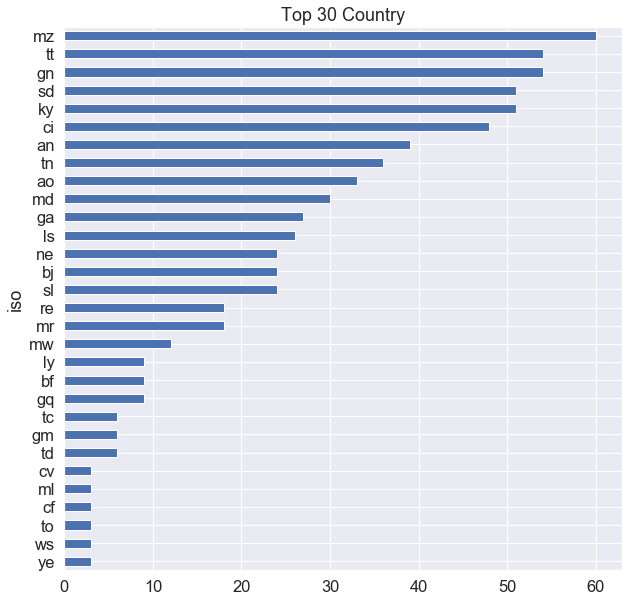

In [8]:
# 국가 별 데이터 분포

tmp = roam.groupby(by='iso', as_index=True)['count'].sum().sort_values().head(30)
tmp.plot(kind='barh', figsize=(10,10))
plt.title('Top 30 Country')

- 로밍 
- 모잠비크, 기니, 트리니다드토바고, 수단, 케이맨섬

In [9]:
tmp.sort_values(ascending=False)

iso
mz    60
gn    54
tt    54
sd    51
ky    51
ci    48
an    39
tn    36
ao    33
md    30
ga    27
ls    26
ne    24
bj    24
sl    24
mr    18
re    18
mw    12
ly     9
bf     9
gq     9
tc     6
gm     6
td     6
cv     3
ml     3
cf     3
to     3
ws     3
ye     3
Name: count, dtype: int64

In [10]:
# 날짜 변수로 변경
roam['return'] = pd.to_datetime(roam['return'], format='%Y%m%d')

In [11]:
roam['arrival'] = pd.to_datetime(roam['arrival'], format='%Y%m%d')
roam['departure'] = pd.to_datetime(roam['departure'], format='%Y%m%d')

In [12]:
roam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212325 entries, 0 to 212324
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   return     212325 non-null  datetime64[ns]
 1   iso        209353 non-null  object        
 2   arrival    212325 non-null  datetime64[ns]
 3   departure  212325 non-null  datetime64[ns]
 4   count      212325 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(1)
memory usage: 8.1+ MB


In [13]:
# 파생변수 생성
# arrival과 return의 차를 내서 해외에 체류한 일자수를 계산함

roam['stay'] = roam['return'] - roam['arrival']

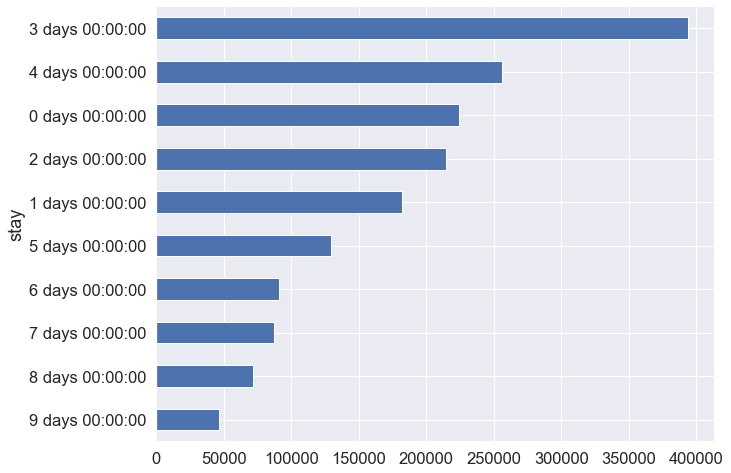

In [14]:
roam.groupby(by='stay')['count'].sum().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10,8))

In [15]:
roam['count'].sum()

1947626

- 총 194만 건의 count 중, 3일 동안의 해외체류가 약 40만건으로 가장 많았고, 4일이 27만건, 0일 2일이 23만건 정도로 나타났다.

count                    212325
mean     9 days 06:51:46.758036
std      7 days 10:06:56.555469
min             0 days 00:00:00
25%             4 days 00:00:00
50%             7 days 00:00:00
75%            12 days 00:00:00
max            31 days 00:00:00
Name: stay, dtype: object


{'whiskers': [<matplotlib.lines.Line2D at 0x2493cb77688>,
 'caps': [<matplotlib.lines.Line2D at 0x2493cba1e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2493cb9ea48>],
 'medians': [<matplotlib.lines.Line2D at 0x2493cba4d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2493cbabc08>],
 'means': []}

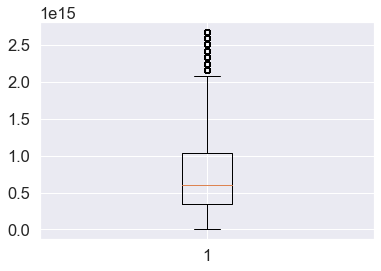

In [16]:
print(roam['stay'].describe().T)
plt.boxplot(roam['stay'])

- 최고 체류일자는 31일이다. 
- 대체로 출발부터 귀국까지 7일 정도 이용하는 것으로 보인다.

In [17]:
roam.head()

,return,iso,arrival,departure,count,stay
0,2020-01-31,ad,2020-01-30,2020-01-30,3,1 days
1,2020-01-31,ae,2019-12-31,2020-01-25,3,31 days
2,2020-01-31,ae,2019-12-31,2020-01-31,3,31 days
3,2020-01-31,ae,2020-01-02,2020-01-02,3,29 days
4,2020-01-31,ae,2020-01-04,2020-01-31,3,27 days


Text(0.5, 1.0, '일별 로밍 고객 수')

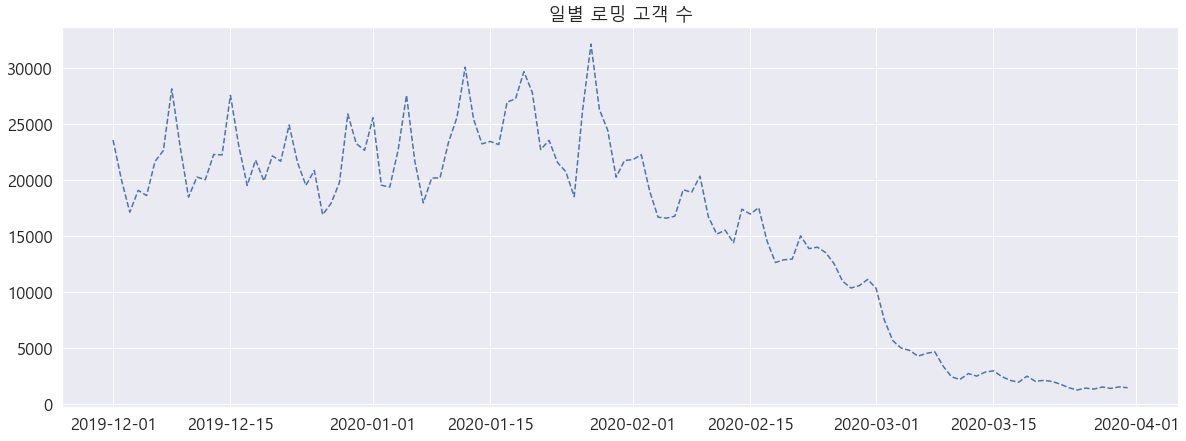

In [21]:
# 날짜에 따른 arrival 고객 확인

group_of_date = roam.groupby('return', as_index=False)[['count']].sum()
plt.figure(figsize=(20,7))
plt.plot(group_of_date['return'],group_of_date['count'],'--', label="value")
plt.title('일별 로밍 고객 수')

Text(0.5, 1.0, '일별 로밍 평균 고객 수')

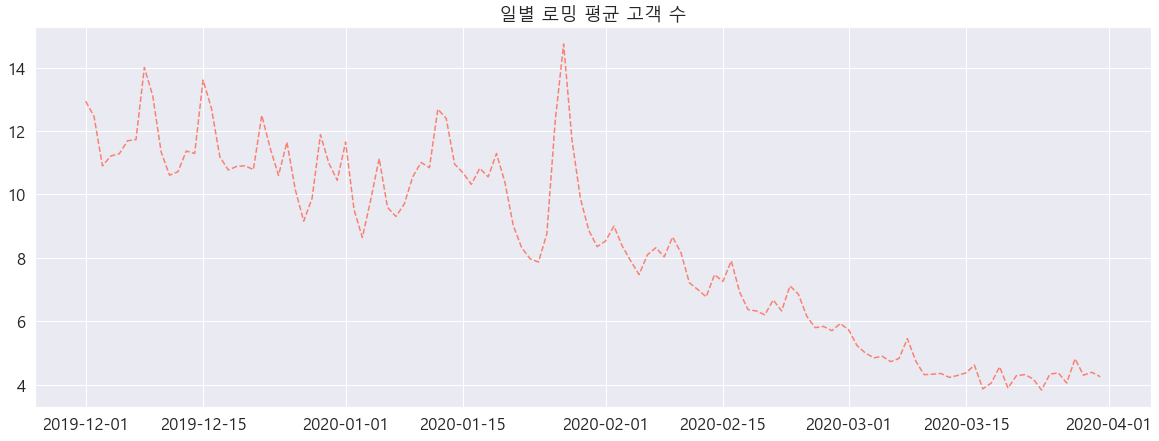

In [22]:
# 날짜에 따른 arrival 고객 확인

group_of_date = roam.groupby('return', as_index=False)[['count']].mean()
plt.figure(figsize=(20,7))
plt.plot(group_of_date['return'],group_of_date['count'],'--', label="value", color='salmon')
plt.title('일별 로밍 평균 고객 수')

- 일정한 주기를 띄는 것을 보아 주말에 arrival한 사람들이 많는 것으로 보인다.
- 코로나 감염이 크게 확산됐던 1월 말 경에는 로밍 숫자가 최고점을 찍고
- 이후 계속적으로 감소한다.

# 2. 캐글 데이터

In [2]:
kag = pd.read_csv('./data/covid_19_clean_complete.csv')

In [3]:
kag['Date'] = pd.to_datetime(kag['Date'])

In [4]:
kag.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


Province/State    15470
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


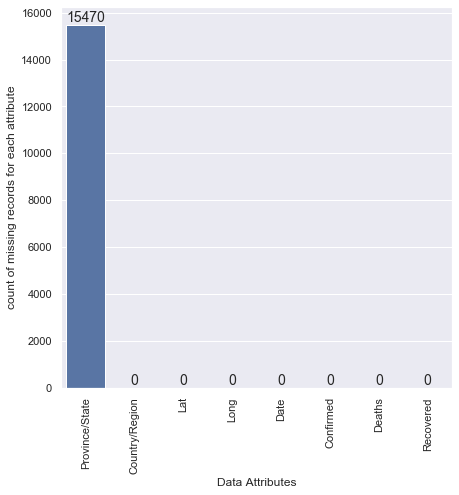

In [5]:
# 전체 결측치 확인
x = kag.columns
y = kag.isnull().sum()
print(y)
plt.figure(figsize=(7,7))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           int(height),
           fontsize=14,
           ha='center',
           va='bottom')
sns.set(font_scale = 1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [6]:
# 위도 경도 값이 국가 위치인지 확인

kag.groupby(['Country/Region'])['Lat','Long'].mean()

C:\Users\Joshua\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Lat,Long
Country/Region,,
Afghanistan,33.000000,65.000000
Albania,41.153300,20.168300
Algeria,28.033900,1.659600
Andorra,42.506300,1.521800
Angola,-11.202700,17.873900
...,...,...
West Bank and Gaza,31.952200,35.233200
Western Sahara,24.215500,-12.885800
Yemen,15.552727,48.516388


# 이상치 검출

In [102]:
kag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22270 entries, 0 to 22269
Data columns (total 8 columns):
Province/State    6800 non-null object
Country/Region    22270 non-null object
Lat               22270 non-null float64
Long              22270 non-null float64
Date              22270 non-null datetime64[ns]
Confirmed         22270 non-null int64
Deaths            22270 non-null int64
Recovered         22270 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.4+ MB


In [110]:
kag[['Confirmed','Deaths','Recovered']].head()

,Confirmed,Deaths,Recovered
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


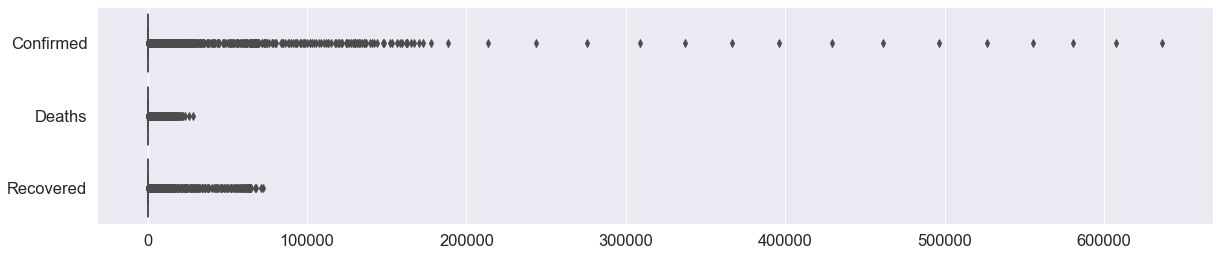

In [114]:
plt.figure(figsize=(20,4))
sns.boxplot(data=kag[['Confirmed','Deaths','Recovered']], orient='h')

In [86]:
# 백분위수 기반 이상치 검출
# 백분위 수 범위가 2.5~97.5 사이인 모든 데이터를 사용하기 위해 Threshold를 95%로 설정하여 범위를 도출한다.

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold)/2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))

In [88]:
# 중위수 절대 편차 기반 이상치 검출

def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in points]
    
    return np.abs(modified_z_scores) > threshold

In [89]:
# 표준편차 기반 이상점 검출
# 표준편차와 평균값을 이용해서 이상치을 찾는다.
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

In [90]:
# 다수결 투표 기반 이상치 검출
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    
    temp = list(zip(data.index, x, y, z))
    
    final = []
    for i in range(len(data.index)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [91]:
# 이상치 시각화

def plotOutlier(x):
    fig,axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers),'ro', clip_on=False)
    
    kwargs = dict(y=0.95, x=0.5, ha='left', va ='top', size = 20)
    axes[0].set_title("Percentitle-based Outliers", **kwargs)
    axes[1].set_title('MAD-based Outliers',**kwargs)
    axes[2].set_title('STD-based Outliers',**kwargs)
    axes[3].set_title('Majority vote based Outliers',**kwargs)
    fig.suptitle("Comparing Outlier Tests with n={}".format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

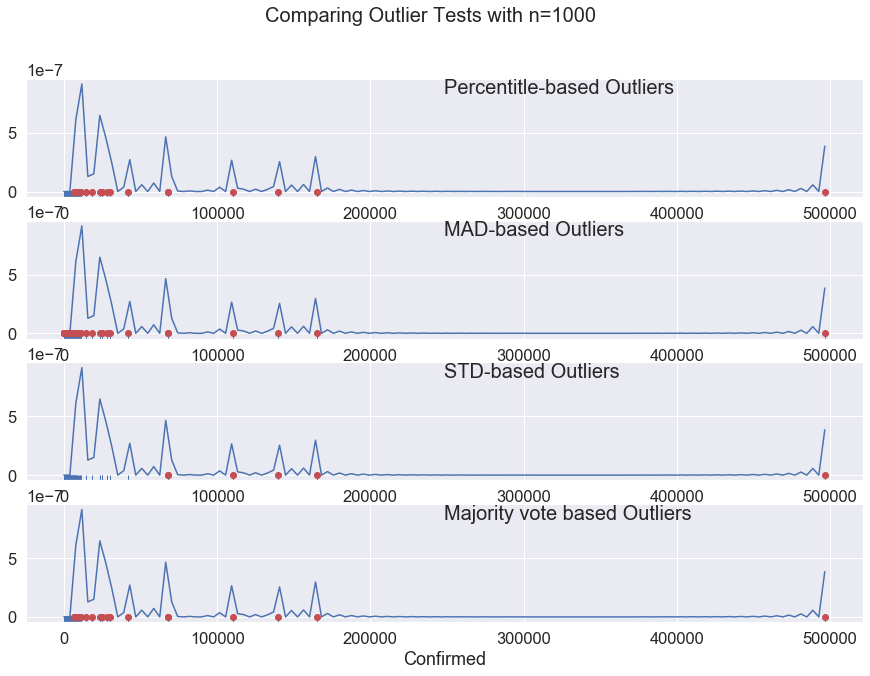

In [100]:
plotOutlier(kag.Confirmed.sample(1000))

In [26]:
kag_dated = kag.groupby(['Date'], as_index=False)['Confirmed'].sum()

count                     122
unique                    122
top       2020-03-13 00:00:00
freq                        1
first     2019-12-01 00:00:00
last      2020-03-31 00:00:00
Name: return, dtype: object
count                      85
unique                     85
top       2020-03-13 00:00:00
freq                        1
first     2020-01-22 00:00:00
last      2020-04-15 00:00:00
Name: Date, dtype: object


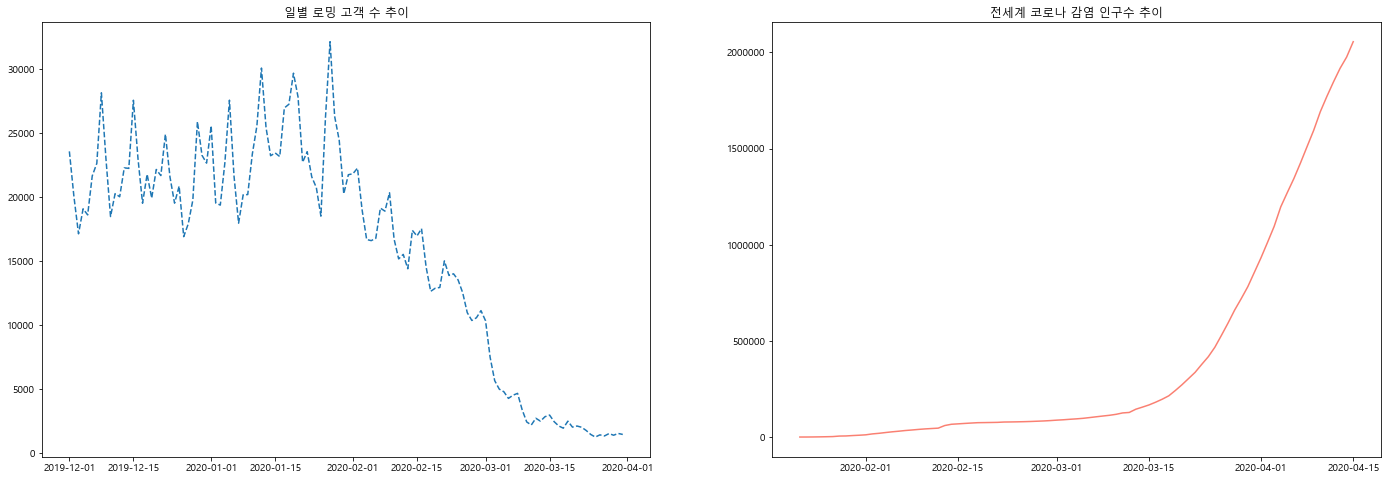

In [37]:
# 날짜에 따른 arrival 고객 확인

group_of_date = roam.groupby('return', as_index=False)[['count']].sum()
fig, ax = plt.subplots(nrows = 1, ncols = 2,
                      figsize = (24,8))
ax[0].plot(group_of_date['return'],group_of_date['count'],'--', label="count")
ax[0].set_title('일별 로밍 고객 수 추이')
ax[1].plot(kag_dated['Date'], kag_dated['Confirmed'], '-', label='Confirmed', color='salmon')
ax[1].set_title('전세계 코로나 감염 인구수 추이')
print(group_of_date['return'].describe())
print(kag_dated['Date'].describe())

1. 캐글 데이터에서 일별 한국 확진자 추출
2. 추출한 데이터와 로밍데이터 결합

In [34]:
kag.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [64]:
# 한국데이터 추출
kag_kor = kag.loc[kag['Country/Region']=='South Korea']

In [65]:
kag_kor.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
21103,NaN,South Korea,36.0,128.0,2020-04-11,10480,211,7243
21365,NaN,South Korea,36.0,128.0,2020-04-12,10512,214,7368
21627,NaN,South Korea,36.0,128.0,2020-04-13,10537,217,7447
21889,NaN,South Korea,36.0,128.0,2020-04-14,10564,222,7534
22151,NaN,South Korea,36.0,128.0,2020-04-15,10591,225,7616


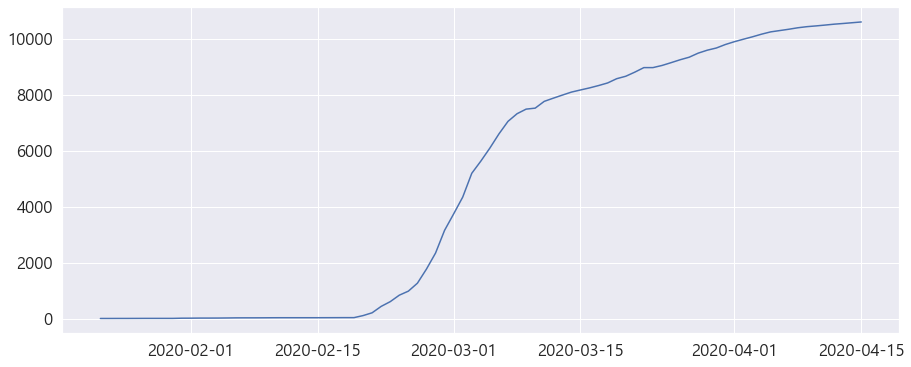

In [41]:
plt.figure(figsize=(15,6))
plt.plot(kag_kor.Date, kag_kor.Confirmed)

In [69]:
kor = kag_kor.copy()

In [70]:
kor.reset_index(inplace=True)
kor.drop('index', axis=1, inplace=True)

In [71]:
kor.drop('Province/State', axis=1, inplace=True)

In [74]:
# 대한민국 일별 확진자수 컬럼 형성
kor['Confirmed_1'] = np.nan
kor['Confirmed_1'][1:] = kor['Confirmed'][0:-1]
kor['Confirmed_1'].iloc[0] = 0
kor['Confirmed_1'] = kor['Confirmed_1'].astype('int64')
kor['day_confirmed'] = kor['Confirmed'] - kor['Confirmed_1']
kor.drop('Confirmed_1',axis=1, inplace=True)
kor.head()

C:\Users\Joshua\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,day_confirmed
0,South Korea,36.0,128.0,2020-01-22,1,0,0,1
1,South Korea,36.0,128.0,2020-01-23,1,0,0,0
2,South Korea,36.0,128.0,2020-01-24,2,0,0,1
3,South Korea,36.0,128.0,2020-01-25,2,0,0,0
4,South Korea,36.0,128.0,2020-01-26,3,0,0,1


In [94]:
kor['Date'][kor['day_confirmed']==max(kor['day_confirmed'])]

41   2020-03-03
Name: Date, dtype: datetime64[ns]

41   2020-03-03
Name: Date, dtype: datetime64[ns]


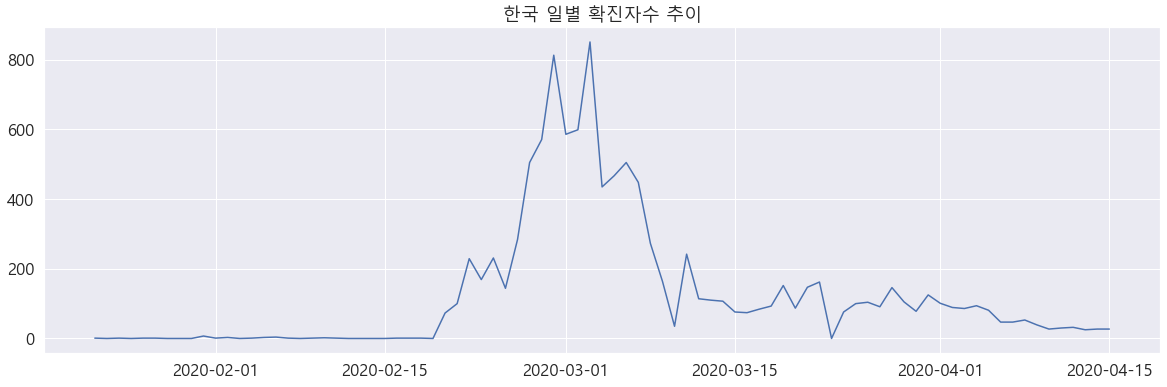

In [102]:
plt.figure(figsize=(20,6))
plt.plot(kor['Date'], kor['day_confirmed'])
plt.title("한국 일별 확진자수 추이")
max_day = kor['Date'][kor['day_confirmed']==max(kor['day_confirmed'])]
print(max_day)

# 3. 감염병데이터

|컬럼명|컬럼한국명|컬럼설명|샘플|
|:-----:|:-----:|:------|:------:|
|파일명|파일명|파일리스트의 파일명과 일치|AFRO2019120200003|
|제목|제목|기사의 제목|WHO supports Angola’s Government efforts to end polio outbreak|
|URL|원문기사링크|해당 기사의 원문 링크|https://www.afro.who.int/news/who-supports-angolas-government-efforts-end-polio-outbreak
|수집일자|수집일자|KT 크롤링 시스템에 의해 기사가 수집된 날짜|2019-12-02 21:00:16.0|
|게시일자|게시일자|원문 Site에 해당 기사가 게시된 날짜|2019-12-02 00:00:00|
|채널명|채널명|기사가 게시된 Site의 이름|AFRO|
|감염병명|감염병명|기사에 표기된 감염병의 이름|Poliomyelitis|
|분류명|분류명|감염병의 분류(카테고리) 명|Viral|


In [38]:
news = pd.read_excel('./data/corona_contest_data_0406/3-1. NewsList.xls', sheet_name="List")

In [39]:
news.head()

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02 00:00:00,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral


In [40]:
# 전체 기사 중 병명에 따른 누적 갯수
cum_viral = news.groupby('분류명', as_index=False)[['파일명']].count().sort_values(by='파일명')
cum_viral

,분류명,파일명
3,Parasitic (Arthropods),19
6,Parasitic (Trematodes),26
7,Parasitic (nematodes),40
4,Parasitic (Cestodes),52
2,Parasitic,53
8,Prion,65
9,Rickettsial,104
1,Fungal,110
5,Parasitic (Protozoans),845
0,Bacterial,3138


<BarContainer object of 3 artists>

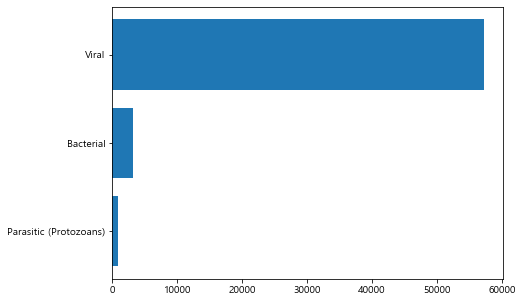

In [41]:
# 상위 3개 중 viral의 비중이 압도적이다.
plt.figure(figsize=(7,5))
plt.barh('분류명', '파일명',data=cum_viral.tail(3))

In [42]:
total_length = len(news['분류명'])
viral_length = len(news[news['분류명'] == 'Viral'])

per_of_viral = round(viral_length / total_length * 100, 2)
per_of_viral

92.79

- viral의 비중의 92.79%이기 때문에 다른 데이터들은 삭제해도 무관할 것으로 보인다.

In [43]:
# viral만 가지고 있는 데이터 셋 생성

viral_news = news[news['분류명'] == 'Viral']
viral_news.head()

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02 00:00:00,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral


- viral에 관한 뉴스기사 중 61%가 코로나 바이러스에 대한 뉴스기사이다.

In [54]:
# 감염병명에 따른 분포
tmp = viral_news.groupby(by='감염병명', as_index=False)[['파일명']].count().sort_values(by='파일명', ascending=True)
tmp.head()

,감염병명,파일명
47,Nipha virus infection,1
15,Contagious ecthyma,1
77,Viral hepatitis A,1
38,Lymphocytic choriomeningitis,1
76,Viral hemorrhagic fever,1


In [55]:
tmp.sort_values('파일명', ascending=False).head()

,감염병명,파일명
9,COVID-19,35238
33,Influenza,6760
18,Dengue fever,3945
40,Measles,1587
63,Severe acute respiratory syndrome,1574


In [64]:
total_ = tmp.파일명.sum()
covid_ = tmp.iloc[84,1]
per_of_covid = round(covid_/total_*100,2)
per_of_covid

61.53

In [70]:
df_count.sort_values()

감염병명
Nipha virus infection                      1
Contagious ecthyma                         1
Viral hepatitis A                          1
Lymphocytic choriomeningitis               1
Viral hemorrhagic fever                    1
Nairobi sheep disease                      1
Western equine encephalitis                1
Human bocavirus infection                  1
Barmah Forest fever                        1
Astroviral gastroenteritis                 1
Venezuelan hemorrhagic fever               1
Rhinovirus infection                       1
Oropouche virus infection                  1
Usutu virus infections                     2
Argentinian hemorrhagic fever              2
St. Louis encephalitis                     2
Vaccinia virus infection                   2
Parainfluenza virus infection              3
Ross River fever                           3
Venezuelan equine encephalitis             4
Hand foot and mout disease                 4
Bolivian hemorrhagic fever                 4
Capri

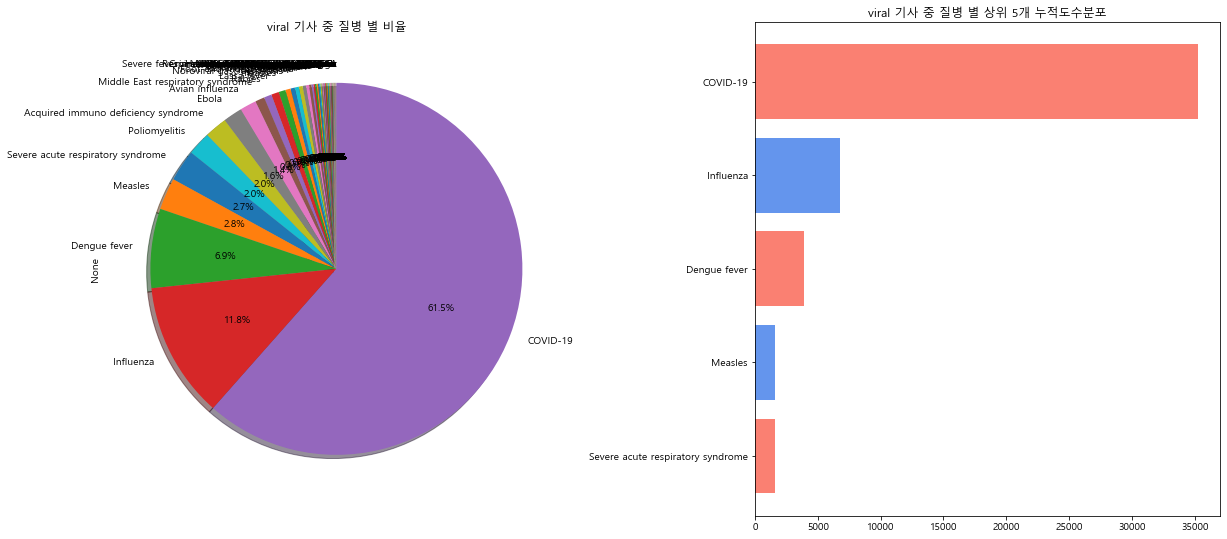

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
df_count = viral_news.groupby(by='감염병명', as_index=False)[['파일명']].size().sort_values()
df_count.plot.pie(autopct = "%.1f%%", startangle=90, shadow=True, textprops={'fontsize': 10}, ax=ax[0])
ax[0].set_title('viral 기사 중 질병 별 비율')
ax[1].barh('감염병명', '파일명',data=tmp.tail(5), color=['salmon', 'cornflowerblue'])
ax[1].set_title('viral 기사 중 질병 별 상위 5개 누적도수분포')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

In [138]:
viral_news.head()

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02 00:00:00,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral


In [137]:
viral_news['채널명'].unique()

array(['AFRO', 'All africa', 'Al jazeera', 'BBC', 'CBC', 'CDC Taiwan',
       'Centre for Health Protection',
       'CIDARS (China Infectious Disease Automated Alert and Re sponse System)',
       'CIDRAP', 'CNN', 'Dantri Vietnam', 'Disease Daily', 'ECDC', 'EFSA',
       'WHO/EMRO', 'Flu Trackers', 'GEIS',
       'GOARN (Global Outbreak Alert and Response Network)', 'GPHIN',
       'Health Canada', 'HealthMap', 'MediSys', 'Ministry of Health',
       'Ministry of Health(Saudi Arabia)', 'CDC Nigeria',
       'Outbreak News Today', 'Reliefweb', 'WHO/PAHO',
       'Public Health England', 'ProMED', 'REUTERS', 'WHO/SEARO', 'SINA',
       'Tuoitre', 'VCDC', 'WAHIS', 'WHO/DONs', 'WHO/News', 'WHO/IHR',
       'Wuhan Municipal Health Commission', 'Xinhua',
       'Shanghai Municioal Health Commission',
       'Health Commission of Guangdong Province'], dtype=object)

In [147]:
viral_news['수집일자'][0][:10]

'2019-12-02'

In [151]:
viral_news['date'] = viral_news['수집일자'].apply(lambda x: x[:10])
viral_news['date'] = pd.to_datetime(viral_news['date'], format='%Y-%m-%d')

C:\Users\Joshua\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Joshua\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [154]:
viral_news['date'].describe()

count                   57272
unique                    118
top       2020-03-31 00:00:00
freq                     1183
first     2019-12-01 00:00:00
last      2020-04-01 00:00:00
Name: date, dtype: object

In [155]:
# 총 122일 동안의 기사들이다.
max(viral_news['date']) - min(viral_news['date'])

Timedelta('122 days 00:00:00')